In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# Dataset customers

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the file path for the customers dataset (to be specified as a raw string).
path_customers_dataset = r''

# Define the file path for the orders dataset (to be specified as a raw string).
path_orders_dataset = r''

# Load the customers dataset from the specified Excel file into a Pandas DataFrame.
df_customer = pd.read_excel(path_customers_dataset)

# Load the orders dataset from the specified Excel file into a Pandas DataFrame.
df_orders = pd.read_excel(path_orders_dataset)


In [ ]:
df_customer.head()

In [23]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22625 entries, 0 to 22624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  22625 non-null  int64 
 1   GENDER       22625 non-null  object
 2   AGE          22625 non-null  int64 
 3   GEOGRAPHY    22625 non-null  object
dtypes: int64(2), object(2)
memory usage: 707.2+ KB


In [24]:
# Check Null values
df_customer.isnull().sum()

,0
Customer_ID,0
GENDER,0
AGE,0
GEOGRAPHY,0


<Axes: xlabel='GEOGRAPHY'>

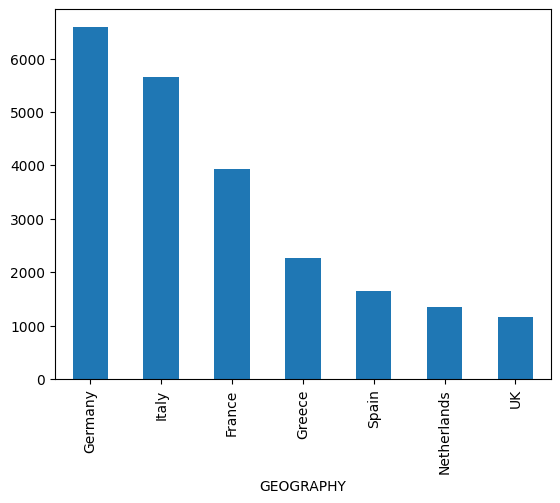

In [25]:
df_customer.GEOGRAPHY.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

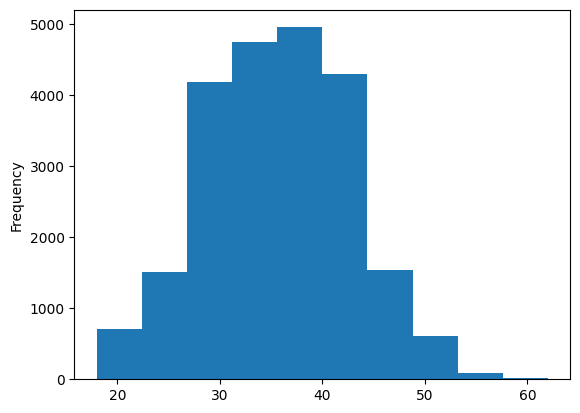

In [26]:
df_customer.AGE.plot(kind='hist')

<Axes: xlabel='GENDER'>

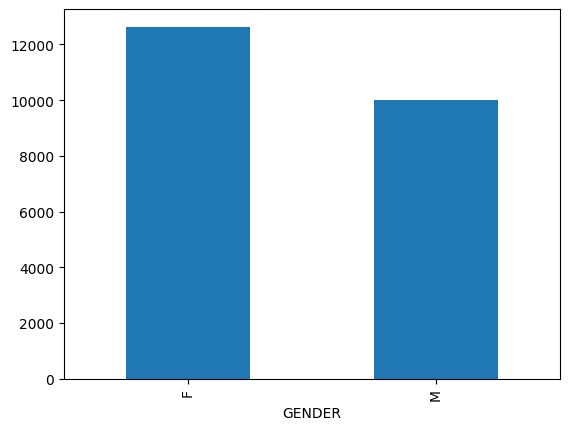

In [27]:
df_customer.GENDER.value_counts().plot(kind='bar')

# dataset orders

In [29]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              131706 non-null  int64         
 1   Date            131706 non-null  datetime64[ns]
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 8.0+ MB


In [30]:
# check null values
df_orders.isnull().sum()

,0
id,0
Date,0
Customer_ID,0
Transaction_ID,0
SKU_Category,0
SKU,0
Quantity,0
Sales_Amount,0


In [31]:
df_orders.SKU_Category.nunique()

187

<Axes: xlabel='SKU_Category'>

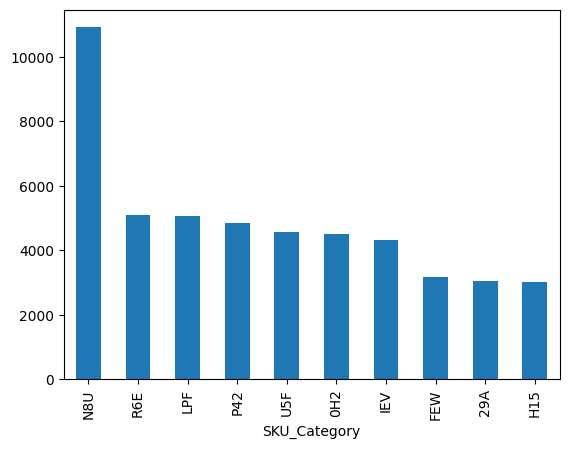

In [32]:
df_orders.SKU_Category.value_counts().head(10).plot(kind='bar')

In [33]:
df_orders.SKU.nunique()

5242

In [34]:
# Creating the column total_payment

df_orders['total_payment']= df_orders.Sales_Amount * df_orders.Quantity

df_orders.head()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,total_payment
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [35]:
df_orders['total_payment'].sum()

2760512.3781500007

# Concatenating the 2 dataframes by Customer_ID

In [36]:
df_concatenate = pd.merge(df_customer, df_orders,on="Customer_ID")

df_concatenate.head()

,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,total_payment
0,2547,M,43,Greece,1,2021-01-02,1,X52,0EM7L,1.0,3.13,3.13
1,2547,M,43,Greece,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69,12.69
2,2547,M,43,Greece,7800,2021-01-25,3743,X52,885U7,1.0,4.95,4.95
3,2547,M,43,Greece,7801,2021-01-25,3743,29A,A59HR,3.0,6.24,18.72
4,2547,M,43,Greece,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75,11.75


In [37]:
df_final = df_concatenate.copy()

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Customer_ID     131706 non-null  int64         
 1   GENDER          131706 non-null  object        
 2   AGE             131706 non-null  int64         
 3   GEOGRAPHY       131706 non-null  object        
 4   id              131706 non-null  int64         
 5   Date            131706 non-null  datetime64[ns]
 6   Transaction_ID  131706 non-null  int64         
 7   SKU_Category    131706 non-null  object        
 8   SKU             131706 non-null  object        
 9   Quantity        131706 non-null  float64       
 10  Sales_Amount    131706 non-null  float64       
 11  total_payment   131706 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 12.1+ MB


# Creating the column month

<Axes: xlabel='Date'>

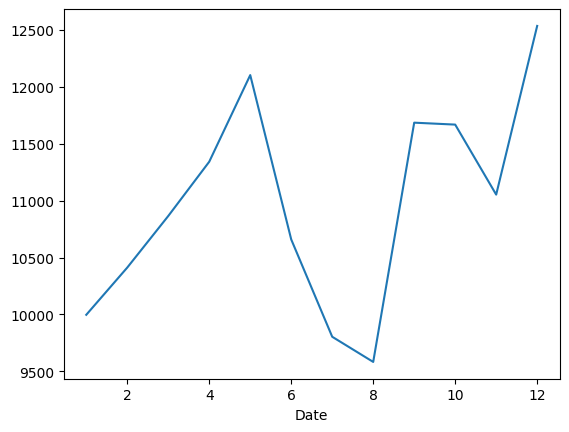

In [39]:
df_final.Date.dt.month.value_counts().sort_index().plot()

In [40]:
df_final['month_name'] = df_final['Date'].dt.strftime('%b')

In [41]:
df_final.month_name.value_counts()

,count
month_name,
Dec,12535
May,12103
Sep,11685
Oct,11668
Apr,11342
Nov,11053
Mar,10865
Jun,10659
Feb,10412


In [42]:
df_final.month_name.value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

,count
month_name,
Jan,9997
Feb,10412
Mar,10865
Apr,11342
May,12103
Jun,10659
Jul,9804
Aug,9583
Sep,11685


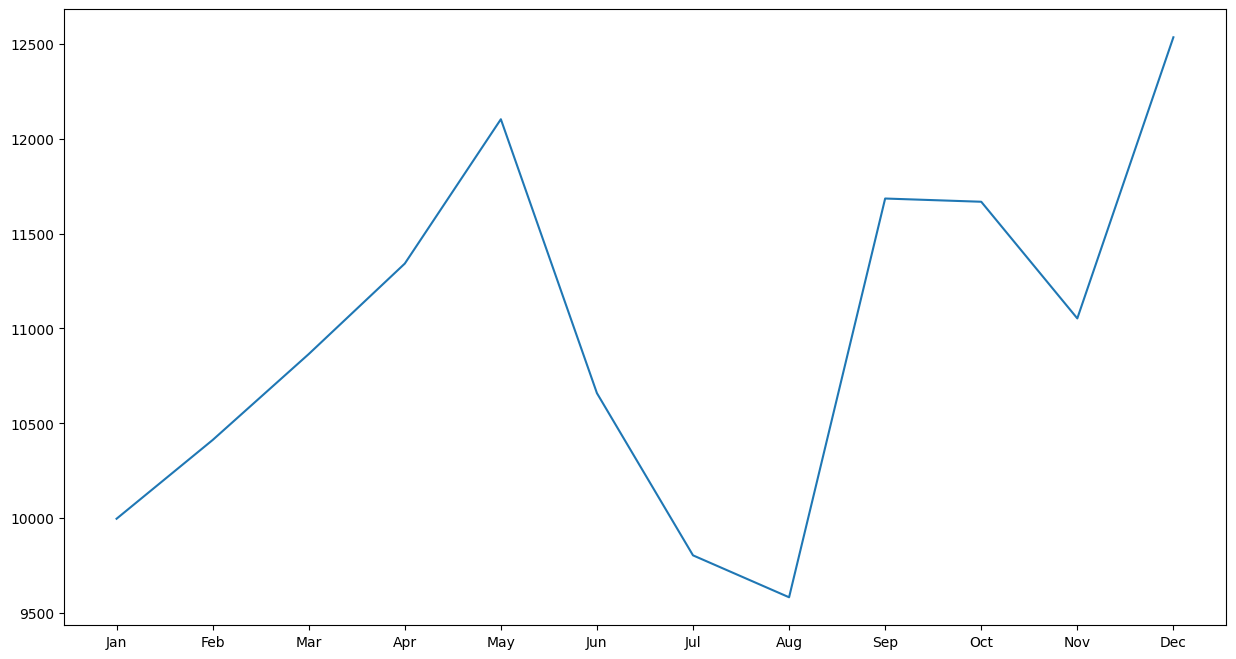

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(df_final.month_name.value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))

# Recency (R)
# How many days ago was the last purchase made by this customer?

In [44]:
df_final.groupby('Customer_ID').Date.max().rename('date_max_purchase').reset_index().head()

,Customer_ID,date_max_purchase
0,1,2021-01-22
1,2,2021-06-19
2,3,2021-01-02
3,4,2021-11-09
4,5,2021-07-05


In [45]:
df_max_date = df_final.groupby('Customer_ID').Date.max().rename('date_max_purchase').reset_index()
df_max_date['recency'] = (df_max_date['date_max_purchase'].max()-df_max_date['date_max_purchase']).dt.days
df_max_date.head()

,Customer_ID,date_max_purchase,recency
0,1,2021-01-22,343
1,2,2021-06-19,195
2,3,2021-01-02,363
3,4,2021-11-09,52
4,5,2021-07-05,179


<Axes: ylabel='Frequency'>

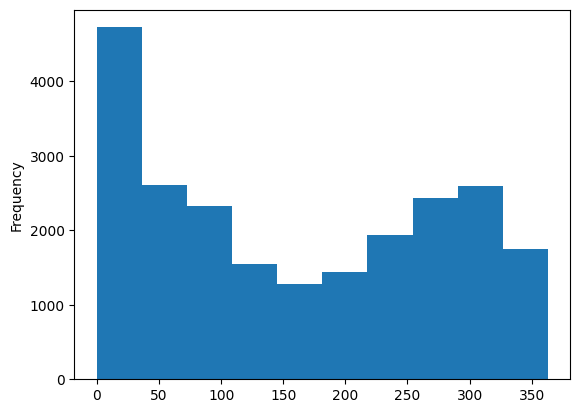

In [46]:
df_max_date.recency.plot(kind='hist')

#Frequency (F)
# How many purchases did this customer make at the company, since registering?

In [47]:
df_final.groupby('Customer_ID').id.count().rename('frecuency').reset_index().head()

,Customer_ID,frecuency
0,1,2
1,2,2
2,3,3
3,4,5
4,5,5


<Axes: >

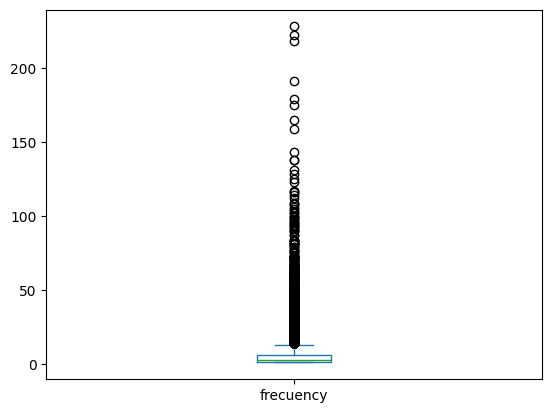

In [48]:
df_final.groupby('Customer_ID').id.count().rename('frecuency').reset_index().frecuency.plot(kind='box')

In [49]:
df_frecuency= df_final.groupby('Customer_ID').id.count().rename('frecuency').reset_index()

In [50]:
df_frecuency.head()

,Customer_ID,frecuency
0,1,2
1,2,2
2,3,3
3,4,5
4,5,5


# Monetary Value (M)
# How much money has this customer already spent at the company?

In [51]:
df_final.groupby('Customer_ID').total_payment.sum().rename('monetary_value').reset_index().head()

,Customer_ID,monetary_value
0,1,16.29
1,2,22.77
2,3,19.08
3,4,33.29
4,5,248.27


In [52]:
df_monetary_value = df_final.groupby('Customer_ID').total_payment.sum().rename('monetary_value').reset_index()

<Axes: >

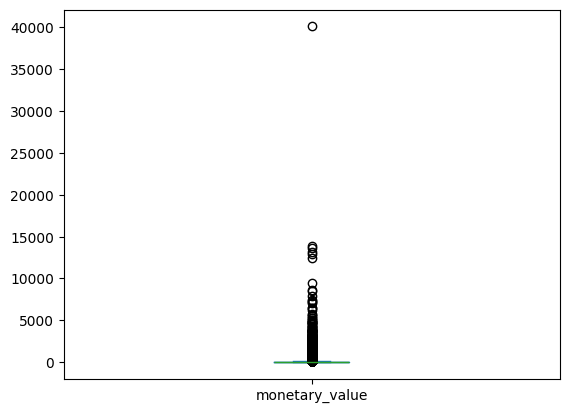

In [53]:
df_monetary_value.monetary_value.plot(kind='box')

# Create the RFM dataset

In [54]:
df_rfm = pd.merge(df_max_date, df_frecuency, on='Customer_ID')
df_rfm = pd.merge(df_rfm, df_monetary_value, on='Customer_ID')
df_rfm.head()

,Customer_ID,date_max_purchase,recency,frecuency,monetary_value
0,1,2021-01-22,343,2,16.29
1,2,2021-06-19,195,2,22.77
2,3,2021-01-02,363,3,19.08
3,4,2021-11-09,52,5,33.29
4,5,2021-07-05,179,5,248.27


In [55]:
df_rfm.drop(columns=['date_max_purchase'], inplace=True)
df_rfm.set_index('Customer_ID', inplace=True)
df_rfm.head()

,recency,frecuency,monetary_value
Customer_ID,,,
1,343,2,16.29
2,195,2,22.77
3,363,3,19.08
4,52,5,33.29
5,179,5,248.27


# Customer Life Time Value (LTM)

**Useful formulas for basic CLV calculation​**

**CLV** = Avg. Purchase Value * Avg. Purchase Frequency * Avg. Customer Lifespan​

**Avg. Purchase Value (APV)** = Total Revenue/ Total Number of Purchases​

**Avg. Purchase Frequency (APF)** = Total Number of Purchases / Total Customers Number​

**Avg. Customer Life Span (ACL)** = 1/ Churn Rate​

**Churn Rate** = 1 - Repeat Rate​

**Repeat Rate** = Customer with at least 2 transactions/ Total Customers Number

## Avg. Purchase Value (APV)

In [57]:
df_rfm.columns

Index(['recency', 'frecuency', 'monetary_value'], dtype='object')

In [96]:
#Total_Revenue = df_rfm.groupby('Customer_ID')['monetary_value'].sum().sum()
# It was given
Total_Revenue = 1578039

In [97]:
Total_Number_of_Purchases = df_rfm['frecuency'].sum()
Total_Number_of_Purchases

131706

In [98]:
APV = Total_Revenue/Total_Number_of_Purchases

APV

11.981527037492597

## Avg. Purchase Frequency (APF)

In [99]:
Total_Customers_Number = df_final.Customer_ID.nunique()

Total_Customers_Number

22625

In [100]:
APF = Total_Number_of_Purchases/Total_Customers_Number

APF

5.821259668508287

## Avg. Customer Life Span (ACL)

**Repeat Rate** = Customer with at least 2 transactions/ Total Customers Number

In [101]:
customer_with_at_least_2_transactions = df_rfm[df_rfm['frecuency']>=2]['frecuency'].count()

In [102]:
Repeat_Rate = customer_with_at_least_2_transactions / Total_Customers_Number

Repeat_Rate

0.7215027624309392

**Churn Rate** = 1 - Repeat Rate

In [103]:
Churn_Rate = 1 - Repeat_Rate

Churn_Rate

0.27849723756906075

In [104]:
ACL = 1 / Churn_Rate

ACL

3.590699888906523

## Customer Life Time Value

In [105]:
CLV = APV * APF * ACL

CLV

250.44262815426126

# Save the final dataframe in a csv format

In [ ]:
df_final.to_csv('file.csv', index=False)  # Set index=False if you don't want to save the DataFrame index

# Clustering

In [106]:
df_rfm.head()

,recency,frecuency,monetary_value
Customer_ID,,,
1,343,2,16.29
2,195,2,22.77
3,363,3,19.08
4,52,5,33.29
5,179,5,248.27


In [107]:
df_rfm.shape

(22625, 3)

In [108]:
# Define a function to standardize the dataset using StandardScaler from sklearn.
# StandardScaler scales the data to have a mean of 0 and a standard deviation of 1.
def StandardScaler_dataset(df):
    
    # Initialize the StandardScaler object.
    scaler = StandardScaler()

    # Fit the scaler to the dataset and transform it, returning the scaled values as a DataFrame.
    # The resulting DataFrame has the same column names as the original dataset.
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply the standardization function to the df_rfm DataFrame and store the result in df_rfm_standard.
df_rfm_standard = StandardScaler_dataset(df_rfm)


In [132]:
# Define a function to calculate clustering evaluation scores for different numbers of clusters.
# The scores calculated are Silhouette Score and Davies-Bouldin Score.
def calculate_scores(datos, min_clusters, max_clusters):
    # Initialize a dictionary to store the scores for each metric.
    scores = {'silhouette_score': [], 'davies_bouldin_score': []}
    
    # Initialize a dictionary to optionally store the cluster assignments for each k (currently commented out).
    cluster_dict = {}
    
    # Define the range of clusters to evaluate, from min_clusters to max_clusters (exclusive).
    clusters_range = range(min_clusters, max_clusters)

    # Loop through the specified range of cluster numbers.
    for k in clusters_range:
        # Initialize the KMeans model with k clusters, 20 initializations, a maximum of 300 iterations, and a fixed random seed.
        kmeans = KMeans(n_clusters=k, n_init=20, max_iter=300, random_state=42)
        
        # Fit the KMeans model and predict the cluster labels for the data.
        clusters = kmeans.fit_predict(X=datos)
        
        # Optionally store the cluster assignments for the current number of clusters (currently commented out).
        # cluster_dict[k] = [clusters]
        
        # Calculate the Silhouette Score for the clustering and append it to the scores dictionary.
        scores['silhouette_score'].append(silhouette_score(datos, clusters))
        
        # Calculate the Davies-Bouldin Score for the clustering and append it to the scores dictionary.
        scores['davies_bouldin_score'].append(davies_bouldin_score(datos, clusters))

    # Create a DataFrame from the scores dictionary, including the cluster numbers as a column.
    df_scores = pd.DataFrame({'clusters': clusters_range, **scores})

    # Return the resulting DataFrame containing the scores for each number of clusters.
    return df_scores


In [133]:
scores_df_rfm_standard = calculate_scores(df_rfm_standard, 2, 11)
scores_df_rfm_standard

,clusters,silhouette_score,davies_bouldin_score
0,2,0.493500,0.851872
1,3,0.542298,0.721447
2,4,0.548603,0.679364
3,5,0.558996,0.657023
4,6,0.560071,0.655921
5,7,0.434756,0.676625
6,8,0.441934,0.752266
7,9,0.444797,0.722569
8,10,0.462317,0.729841


# 5. Validating and visualization of clusters

## Structure validation

In [134]:
df_rfm_standard.shape

(22625, 3)

In [135]:
# Generate random data with the same shape as the standardized RFM dataset (df_rfm_standard).
# np.random.rand creates an array of random numbers uniformly distributed between 0 and 1.
random_data = np.random.rand(df_rfm_standard.shape[0], df_rfm_standard.shape[1])

# Use the calculate_scores function to evaluate clustering metrics (Silhouette and Davies-Bouldin scores)
# for the random dataset with a range of 6 to 7 clusters.
scores_random_data = calculate_scores(random_data, 6, 7)

# Display the calculated scores for the random dataset.
scores_random_data


,clusters,silhouette_score,davies_bouldin_score
0,6,0.285253,0.970167


## Stability validation

In [136]:
# Define a function for cross-validating clustering models.
# This function evaluates the performance of clustering using k-fold cross-validation.
def cross_validate_clustering(data, n_splits, n_clusters):
    # Initialize a KFold cross-validator with the specified number of splits.
    # shuffle=True ensures the data is shuffled before splitting, and random_state=42 ensures reproducibility.
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store Silhouette and Davies-Bouldin scores for each fold.
    silhouette_scores = []
    davies_bouldin_scores = []

    # Iterate through the k-fold splits, where 'train_index' contains the indices of the training data,
    # and the second variable is ignored (no test data used for clustering).
    for train_index, _ in kf.split(data):
        # Extract the training data for the current fold based on the training indices.
        train_data = data[train_index]

        # Initialize the KMeans model with the specified number of clusters.
        kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=42)

        # Fit the KMeans model to the training data.
        kmeans.fit(train_data)

        # Predict the cluster labels for the training data.
        labels = kmeans.predict(train_data)

        # Compute the Silhouette Score for the clustering and append it to the scores list.
        silhouette_scores.append(silhouette_score(train_data, labels))

        # Compute the Davies-Bouldin Score for the clustering and append it to the scores list.
        davies_bouldin_scores.append(davies_bouldin_score(train_data, labels))

    # Return the mean and standard deviation of the Silhouette and Davies-Bouldin scores across all folds.
    return {
        'silhouette': (np.mean(silhouette_scores), np.std(silhouette_scores)),
        'davies_bouldin': (np.mean(davies_bouldin_scores), np.std(davies_bouldin_scores)),
    }


In [137]:
cross_validate_clustering(df_rfm_standard.values, 5, 6)

{'silhouette': (0.535317606474137, 0.048531393829627914),
 'davies_bouldin': (0.6700065978821762, 0.08961082973091636)}

## 6. final *clusters*

In [138]:
kmeans = KMeans(n_clusters = 6, n_init=20, max_iter = 300, random_state=42)
y_pred = kmeans.fit_predict(df_rfm_standard)
labels = kmeans.labels_

df_rfm['Cluster'] = labels

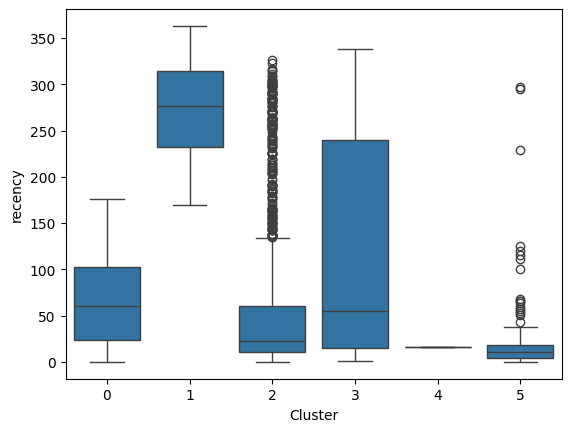

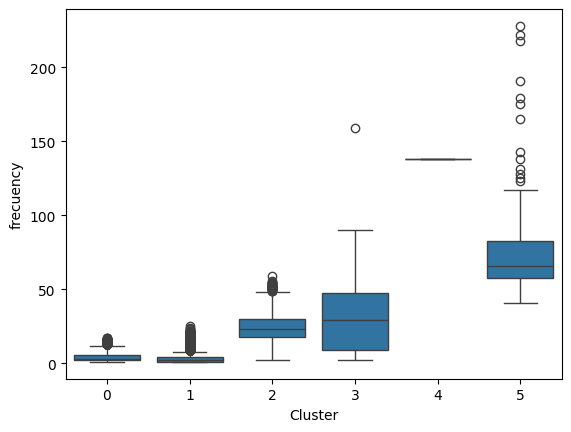

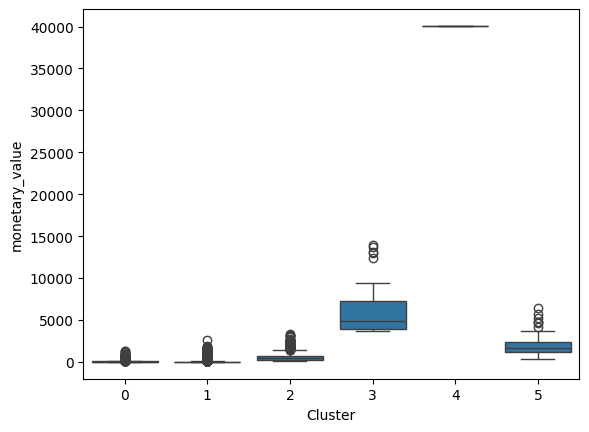

In [ ]:
for attribute in ['recency', 'frecuency', 'monetary_value']:
    sns.boxplot(x='Cluster', y=attribute, data=df_rfm)
    plt.show()

<Axes: xlabel='recency', ylabel='monetary_value'>

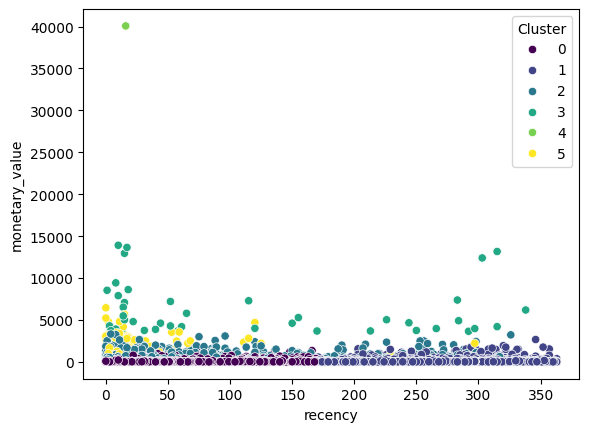

In [ ]:
sns.scatterplot(data=df_rfm, x='recency', y='monetary_value', hue='Cluster',palette='viridis')

<Axes: xlabel='frecuency', ylabel='monetary_value'>

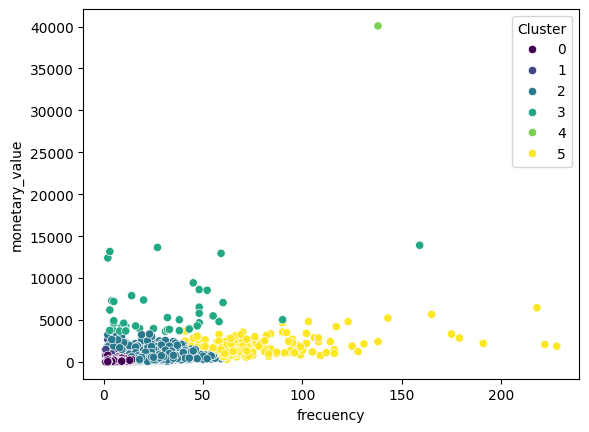

In [ ]:
sns.scatterplot(data=df_rfm, x='frecuency', y='monetary_value', hue='Cluster',palette='viridis')

<Axes: xlabel='recency', ylabel='frecuency'>

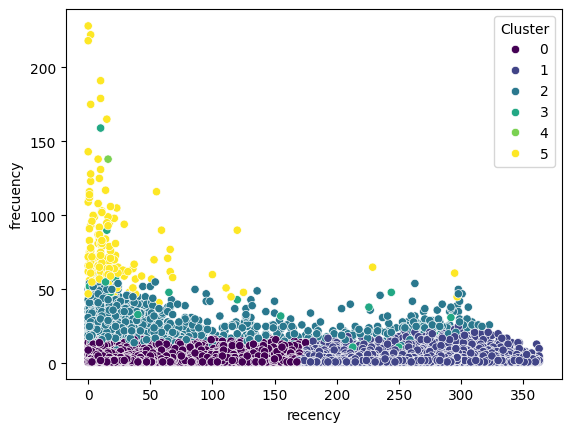

In [ ]:
sns.scatterplot(data=df_rfm, x='recency', y='frecuency', hue='Cluster',palette='viridis')

In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22625 entries, 1 to 22625
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         22625 non-null  int64  
 1   frecuency       22625 non-null  int64  
 2   monetary_value  22625 non-null  float64
 3   Cluster         22625 non-null  int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 795.4 KB


In [ ]:
df_rfm.to_csv('rfm_with_clusters.csv')